#**3장**

##지도 학습

####**K-최근접 이웃**

##### 라이브러리 호출 및 데이터 준비

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

from google.colab import files
file_uploaded=files.upload()
dataset = pd.read_csv('iris.data', names=names) # 데이터 파일을 직접 업로드 했습니다.

Saving iris.data to iris.data


##### 훈련과 테스트 데이터셋 분리

In [3]:
X = dataset.iloc[:, :-1].values # 모든 행을 사용하지만, 열은 뒤에서 하나만 제외하고 사용
y = dataset.iloc[:, 4].values # 모든 행을 사용하지만, 열은 앞에서 5번째에 위치한 것만 사용

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 훈련 데이터와 테스트 데이터의 비율을 8:2로 설정

In [4]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler() # StandardScaler > 평균이 0, 표준편차가 1이 되도록 변환하는 "특성 스케일링"

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

##### 모델 생성 및 훈련

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) # n_neighbors > K를 몇개 지정할 것인가 (50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

##### 모델 정확도

In [6]:
from sklearn.metrics import accuracy_score # 정확도란, 혼동행렬에서 TP+TN / TP+FN+FP+TN 에 해당하는 수치
y_pred = knn.predict(X_test)
print("정확도: {}".format( accuracy_score(y_test, y_pred)))

정확도: 0.8333333333333334


##### 최적의 k 찾기

In [7]:
k=10
acc_array=np.zeros(k)
for k in np.arange(1,k+1,1): # k=1부터 10까지 반복하며 최적의 k와 정확도를 찾는다
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train) 
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1]=acc 

max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
print("정확도 ", max_acc, "으로 최적의 k는", k+1, "입니다.")

정확도  1.0 으로 최적의 k는 1 입니다.


####**서포트 벡터 머신(SVM)**

##### 라이브러리 호출

In [9]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection

import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # ERROR 로그를 추가로 필터링하기 위한 환경변수 설정 (기본값 0, INFO 로그 1, WARNING 로그2, ERROR 로그 3)

##### iris 데이터를 준비하고 훈련과 테스트 데이터셋으로 분리

In [10]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, 
                                                                    iris.target, 
                                                                    test_size=0.6, # 훈련 데이터셋과 테스트 데이터셋을 4:6으로 나눔
                                                                    random_state=42)

##### SVM 모델에 대한 정확도

In [11]:
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5) # 커널함수는 선형 커널을, 오차 허용 범위는 1로, gamma값을 0.5로 설정
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


####**의사결정 트리**

##### 라이브러리 호출 및 데이터 준비

In [12]:
import pandas as pd

from google.colab import files
file_uploaded=files.upload()
df = pd.read_csv('train.csv', index_col='PassengerId') # 데이터 파일을 직접 업로드 했습니다.
print(df.head())

Saving train.csv to train.csv
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5

##### 데이터 전처리

In [13]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # 문자열을 정수로 치환
df = df.dropna() # NA값 삭제
X = df.drop('Survived', axis=1) # training 데이터에 해당 레이블이 속해있으면 100%가 되기 때문 
y = df['Survived']

##### 훈련과 테스트 데이터셋으로 분리

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

##### 결정 트리 모델 생성

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

##### 모델 훈련

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

##### 모델 예측

In [17]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8268156424581006

##### 혼동 행렬을 이용한 성능 측정

In [18]:
from sklearn.metrics import confusion_matrix
pd.DataFrame( # 혼동 행렬 형태로 출력
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,16,51


####**로지스틱 회귀**

##### 라이브러리 호출 및 데이터 준비

In [19]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


##### digits 데이터셋의 시각화

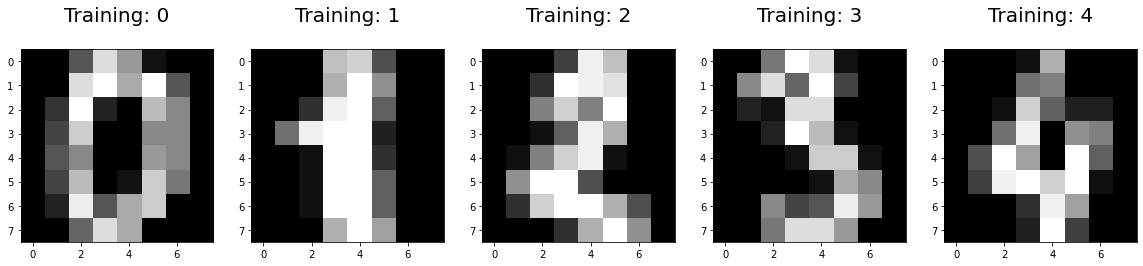

In [20]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])): # 데이터를 다섯개만 슬라이싱 하였음
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

##### 훈련과 테스트 데이터셋 분리 및 로지스틱 회귀 모델 생성

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0) # train vs test = 75% vs 25%

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() # 로지스틱 회귀모델 인스턴스 생성
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### 일부 데이터를 사용한 모델 예측

In [22]:
logisticRegr.predict(x_test[0].reshape(1,-1)) # 테스트 데이터에 대한 예측 결과를 numpy 배열로 출력
logisticRegr.predict(x_test[0:10]) # 이미지 열 개에 대한 예측을 출력

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

##### 전체 데이터를 사용한 모델 예측

In [23]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test) # score 메소드를 사용한 성능 측정
print(score)

0.9511111111111111


##### 혼동 행렬 시각화

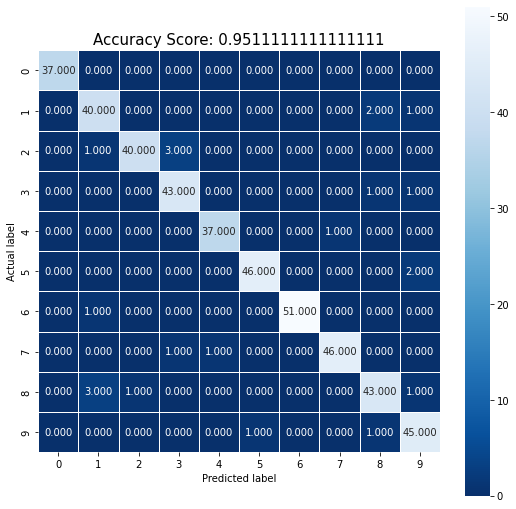

In [24]:
import numpy as np 
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); # heatmap으로 표현
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();

####**선형 회귀**

##### 라이브러리 호출

In [25]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

##### weather.csv 파일 불러오기

In [26]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
dataset = pd.read_csv('weather.csv') # 데이터 파일을 직접 업로드 했습니다.

Saving weather.csv to weather.csv


##### 데이터 간 관계를 시각화로 표현

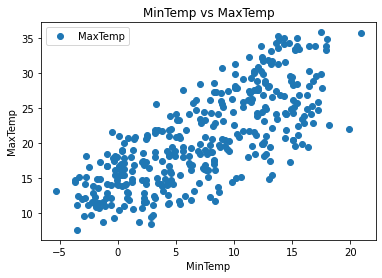

In [27]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o') # 데이터 간 분포 확인을 위한 2D 그래프 시각화
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp') 
plt.show()

##### 데이터를 독립 변수와 종속 변수로 분리하고 선형 회귀 모델 생성

In [28]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # train vs test = 80% vs 20%
regressor = LinearRegression() # 선형 회귀 클래스 가져오기
regressor.fit(X_train, y_train)

LinearRegression()

##### 회귀 모델에 대한 예측

In [29]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


##### 테스트 데이터셋을 사용한 회귀선 표현

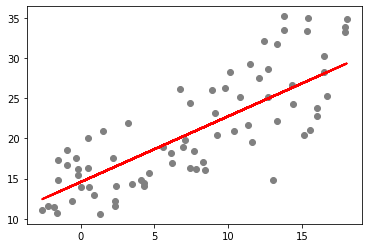

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

##### 선형 회귀 모델 평가

In [30]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

평균제곱법: 17.011877668640622
루트 평균제곱법: 4.124545753006096


##비지도 학습

####**K-평균 군집화**

##### 라이브러리 호출

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

##### 상품에 대한 연 지출 데이터(sales data.csv) 호출

In [32]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
data = pd.read_csv('sales data.csv') # 데이터 파일을 직접 업로드 했습니다.
data.head()

Saving sales data.csv to sales data.csv


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


##### 연속형 데이터와 명목형 데이터로 분류

In [33]:
categorical_features = ['Channel', 'Region'] # 명목형 데이터
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] # 연속형 데이터

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) # 명목형 데이터를 get_dummies()를 통해 0, 1로 변환
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


##### 데이터 전처리(스케일링 적용)

In [34]:
mms = MinMaxScaler() # 연속형 데이터의 모든 특성에 중요성을 동일하게 부여하기 위해 스케일링 적용
mms.fit(data)
data_transformed = mms.transform(data)

##### 적당한 K 값 추출 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

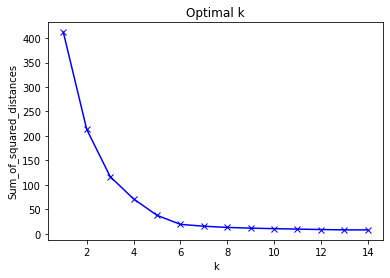

In [35]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1,15) # 1~14 적용 (1을 사용하는 이유는 클러스터링을 했을때 결과가 더 안좋은지를 파악하기 위함)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed) # Kmeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

####**PCA**

##### 라이브러리 호출

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN # 밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA # 데이터 차원 축소

##### 데이터 불러오기

In [37]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
X = pd.read_csv('credit card.csv') # 데이터 파일을 직접 업로드 했습니다.
X = X.drop('CUST_ID', axis = 1) # CUST_ID 칼럼 삭제 (100% 방지)
X.fillna(method ='ffill', inplace = True) 
print(X.head())

Saving credit card.csv to credit card.csv
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000             

##### 데이터 전처리 및 데이터를 2차원으로 차원 축소

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 평균이 0, 표준편차가 1이 되도록 데이터 크기 조정
X_normalized = normalize(X_scaled) # 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2) # 2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330634  0.268879
3 -0.481658 -0.097610
4 -0.563511 -0.482506


##### DBSCAN 모델 생성 및 결과의 시각화

In [39]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_ # 각 데이터 지점에 할당된 모든 클러스터 레이블의 넘파이 배열을 labels에 저장

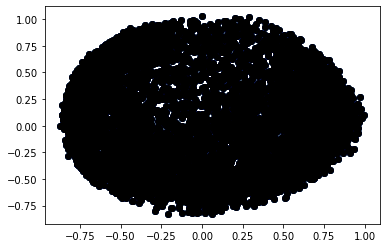

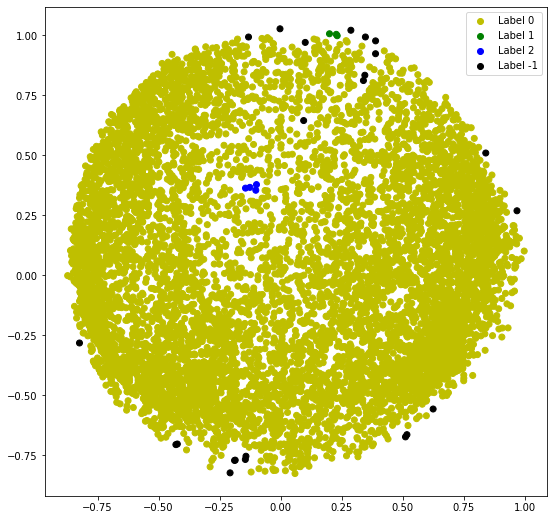

In [40]:
colours = {} 
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
cvec = [colours[label] for label in labels] # 각 데이터 지점별로 색상 벡터 생성
  
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) # 정의된 색상 벡터에 따라 x축에 P1, y축에 P2 찍기
  
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

##### 모델 튜닝

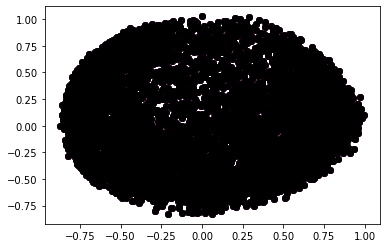

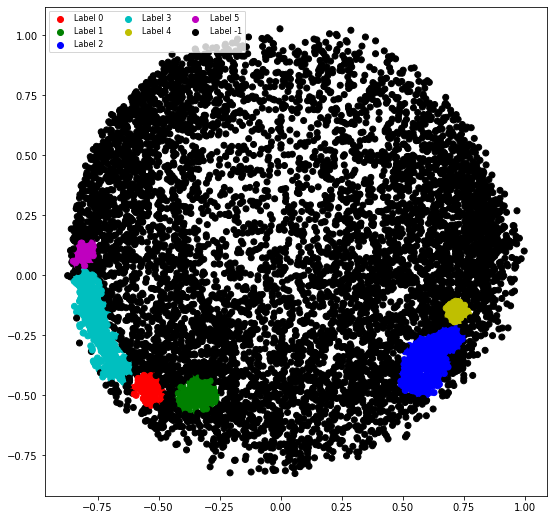

In [41]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) # min_samples의 하이퍼 파라미터를 50으로 바꾸어 진행
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()

##### min_samples를 50에서 100으로 변경

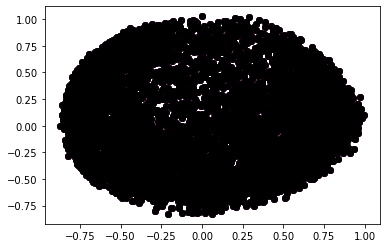

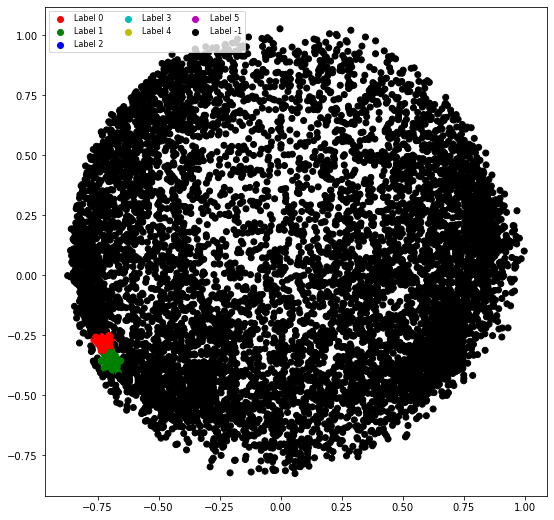

In [42]:
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal) # min_samples를 100으로 바꾸어 진행
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show() # 50으로 했을 때와 달리 Label 0, Label 1만 보이므로, min_samples의 적정값을 찾아 수행하는 것이 좋아보인다고 생각했다.